# Logistic Regression

## Pros
- Simple, highly explainable classifier.
- Classification baseline model.
- Produces interpretable coefficients and intercept.

## Cons
- Low performance compared to modern machine learning models.
- Relationship between features and target must be linear.
- Influenced by covariance.

## References
1. Hands-On Machine Learning, Chapter
1. Machine Learning Pocket Reference, Chapter
1. All of Statistics, Chapter
1. An Introduction to Statistical Learning, Chapter

## The Model

Logistic regression is used to model relationships between independent variables and categorical dependent variables. Instead of regression it would more appropriately be called logistic classification. Output of a logistic model is probability that a data point belongs to a class.

*Logit*: shortened name for logistic model.

### Assumptions of Logistic Regression
- Logit does not make many of the key assumptions of linear models that are based on ordinary least squares algorithms.
    - Does not require a linear relationship between the dependent and independent variables.
    - Error terms (residuals) do not need to be normally distributed Homoscedasticity is not required.
    - Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale (aka not continuous)
- What assumptions do apply?
    - Dependent variable must follow a binomial distribution
    - Observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data
    - Little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
    - Assumes linearity of independent variables and log odds

### The Sigmoid Function
A sigmoid curve is used to fit the data with the decision boundary separating the classes.
$$
    \log(\eta) = \frac{1}{1+\exp(-\eta)}
$$

Where,  
The probability is bound, $0 \leq \text{sigmoid}(x) \leq 1$  
Unlike linear reg. where values can range from $\pm\infty$
- where x goes to $-\infty$, $y=0$
- where x goes to $+\infty$, $y=1$

![](./img/logit_sigmoid.png)

### Log Odds
$$
    p(x) = \frac{1}{1+e^{-(\beta X)}}
$$

$$
    \beta X = \log\left(\frac{p(x)}{1-p(x)}\right)
$$

Where,  
$p(x)$: probability that an observation belongs to a class.  
$-\beta X$: input to the function (algorithm's prediction, e.g. $mx+b$).  
$e$: base of natural log.

### Steps in Logistic Regression
1. Set a threshold value to distinguish between two classes, for example: 
    - < 0.5 = 0
    - \> 0.5 = 1
    - But it's not that simple
1. Use a regression line to create line of best fit for distinguishing between two classes:
    - Examine distance between line and each data point
1. Plug regression formula into logit.
1. Get output prediction for each data point.

### Calculating Probability with The Sigmoid Function
What are the odds that Y belongs to a particular class?
$$
    P(Y=1|X)
$$

For the points near the line, what are the odds that the distance between the point and the line (the error) is greater than 0?
$$
    P(\beta X + \epsilon > 0|X) = P(\epsilon > -(\beta X)|X)
$$

The error terms follow a logistic distribution, so we can use the CDF of the logistic distribution to integrate the probability, which is the sigmoid function.
$$
    P(Y=1|X) = \frac{1}{1+e^{-(\beta X)}}
$$

![](./img/logit_logodds.png)

### Cost Function: Cross Entropy
Cross entropy measure the difference between two probability distributions for a given set of events:
- $P(y)=0$
- $P(y)=1$

$$
    J(\theta) = \frac{1}{m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}), y^{(i)})
$$

$$
    J(\theta) =
    \begin{cases}
    Cost(h_{\theta}(x),y) = -\log(h_{\theta}(x)) &\text{if }y=1 \\
    Cost(h_{\theta}(x),y) = -\log(1-h_{\theta}(x)) &\text{if }y=0
    \end{cases}
$$

This graph shows the outcome of log loss a wrong and more confident answer (higher probability) gets a greater penalty.

![](./img/cross_entropy.png)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer = pd.DataFrame(data['data'], columns=data['feature_names'])
cancer = pd.concat([cancer, pd.Series(data['target'], name='diagnosis')], axis=1)

In [34]:
cancer['diagnosis'] = cancer['diagnosis'].map({0:'malignant',1:'benign'}).astype('category')

In [7]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

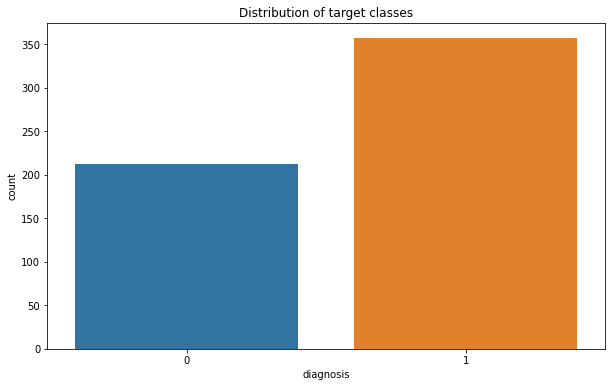

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data=cancer, x='diagnosis')
ax.set_title('Distribution of target classes')
plt.show()

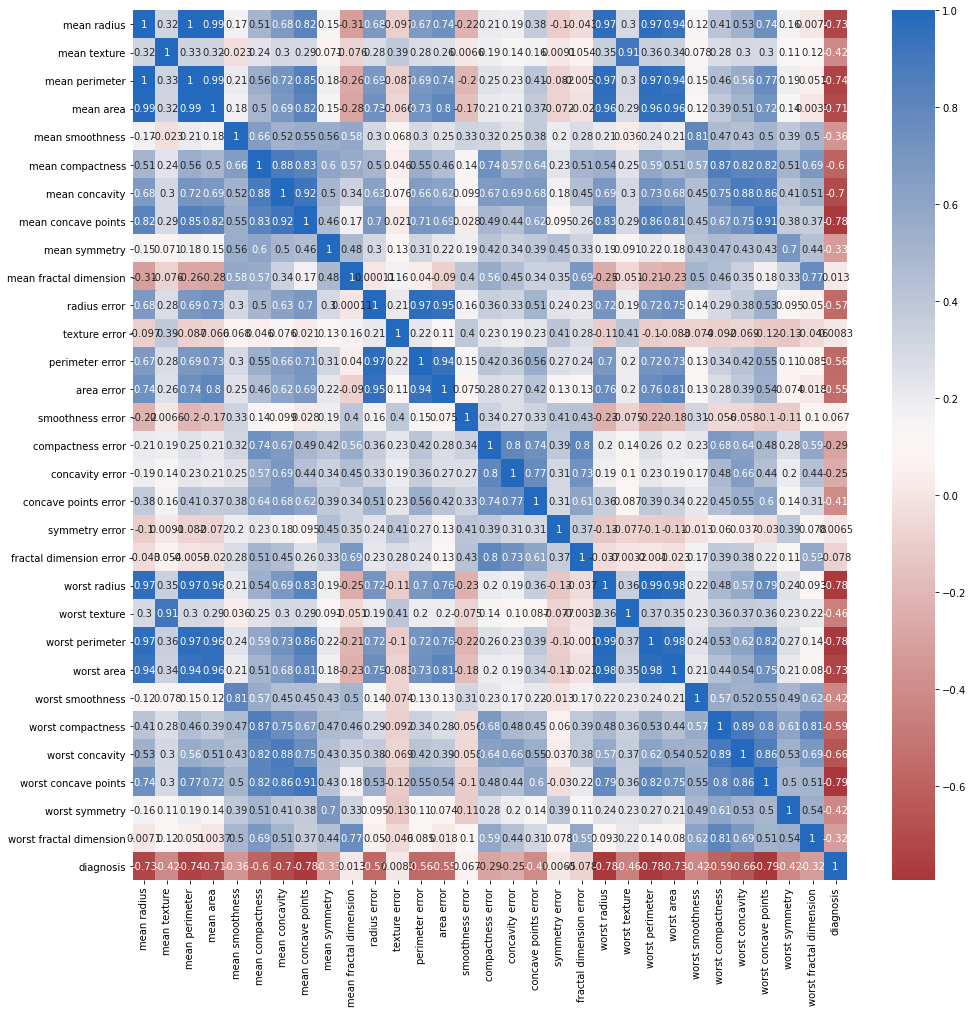

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(cancer.corr(), cmap='vlag_r', annot=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [15]:
logit = LogisticRegression(max_iter=5000) #default max_iter was too low
logit.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [16]:
y_pred = logit.predict(X_test)

### Model Parameters

In [17]:
coefficients = pd.DataFrame(data=logit.coef_.reshape(-1, 1), index=X.columns, columns=['Coefficients'])
coefficients

,Coefficients
mean radius,0.651009
mean texture,0.189260
mean perimeter,-0.187614
mean area,0.023348
mean smoothness,-0.149394
mean compactness,-0.174642
mean concavity,-0.360373
mean concave points,-0.214560
mean symmetry,-0.277863
mean fractal dimension,-0.026880


In [18]:
intercept = pd.DataFrame({'Intercept': logit.intercept_}, index=['bias'])
intercept

,Intercept
bias,30.073377


### Evaluation

In [19]:
import sklearn.metrics as met
import yellowbrick.classifier as ybc

*Accuracy*: 

$$
    
$$

*precision*:

$$
    
$$

*recall*:

$$
    
$$

*F1 score*:

$$
    
$$


In [20]:
accuracy = met.accuracy_score(y_test, y_pred)
precision = met.precision_score(y_test, y_pred)
recall = met.recall_score(y_test, y_pred)
f1_score = met.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.95
Precision: 0.98
Recall: 0.93
F1 Score: 0.95


#### Classification

In [21]:
print(met.classification_report(y_test, y_pred, target_names=classes))

              precision    recall  f1-score   support

   malignant       0.90      0.98      0.94        47
      benign       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



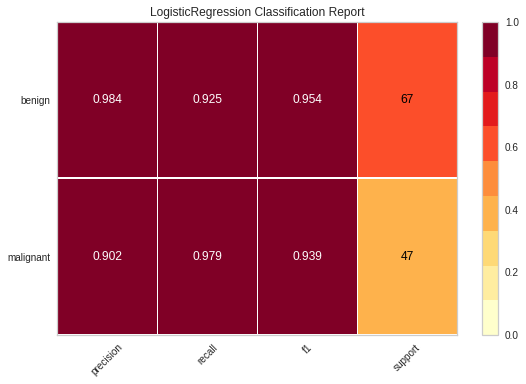

In [22]:
viz = ybc.ClassificationReport(logit, classes=classes, support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#### Confusion Matrix

In [23]:
met.confusion_matrix(y_test, y_pred)

array([[46,  1],
       [ 5, 62]])

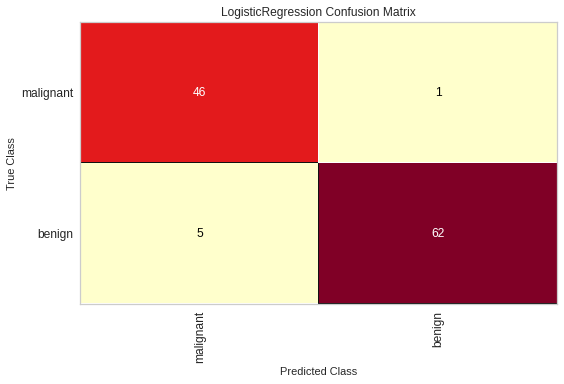

In [24]:
viz = ybc.ConfusionMatrix(logit, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#### Reciever Operating Characteristic Curve/AUC

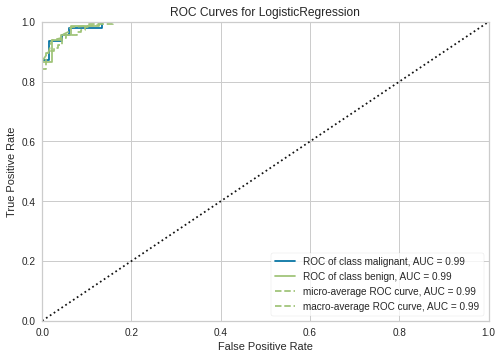

In [25]:
viz = ybc.ROCAUC(logit, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#### Precision-Recall Curve

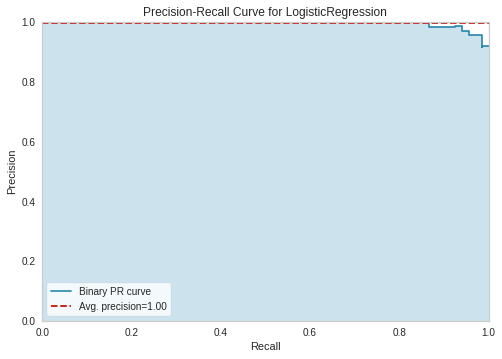

In [26]:
viz = ybc.PrecisionRecallCurve(logit, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#### Class Prediction Error Curve

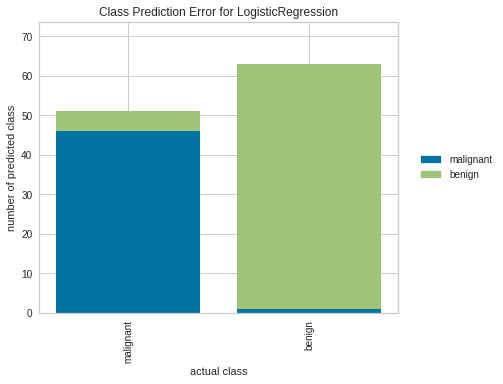

In [27]:
viz = ybc.ClassPredictionError(logit, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

#### Discrimination Threshold

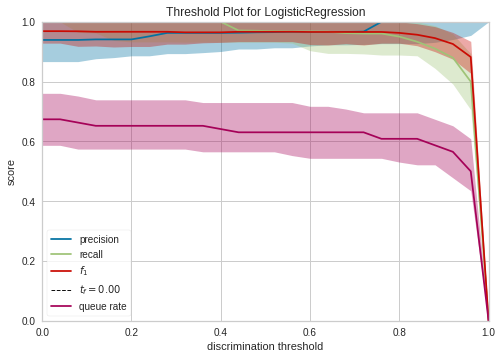

In [28]:
viz = ybc.DiscriminationThreshold(logit, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()